Interacting Proteins

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import sys
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsDontMatter\\')
import plot_utils as p

In [2]:
def format_pval_annotation(pval_symbol, x1, x2, line_start = .05, line_height=.05):
    # for manual adjustment to pval annotations
    
    y, h = line_start, line_height
    plt.plot([x1, x1, x2, x2], #draw horizontal line
             [y, y+h, y+h, y], #vertical line
             lw=1.5, color= '.3')
    plt.text((x1+x2)*.5, # half between x coord
             y+h, pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")


In [3]:
c = cptac.Hnscc()

In [4]:
ip = u.get_interacting_proteins('PTEN')
len(ip)

28

In [5]:
gene = 'PTEN'

In [6]:
mut_type_gbm = c.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = c.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = ip)
prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples
ip_df = prot_and_mutations.iloc[:,:-4] #drop mutation, location cols
mut_type_gbm = mut_type_gbm[['Mutation']] 
merged = ip_df.join(mut_type_gbm) # merge mutation col from function (includes cnv)

# Keep two values to compare
compare = ['Wildtype_Tumor','Deletion']
get = merged['Mutation'].isin(compare)
del_wt = merged[get]
del_wt['Mutation'].value_counts()

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 109 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 382)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-02617, C3N-02727 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 382)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: MDM2, PIK3R3 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 176 samples for the PTEN gene (C:\User

Wildtype_Tumor    87
Deletion          18
Name: Mutation, dtype: int64

In [7]:
cols = list(del_wt.columns[:-1])

u.wrap_ttest(del_wt, 'Mutation', cols)#, return_all = True)


C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\brittany henderson\Anaconda3\e

,Comparison,P_Value
0,PTEN_proteomics,0.000023
1,INPP4B_proteomics,0.000676
2,PIK3CA_proteomics,0.001677


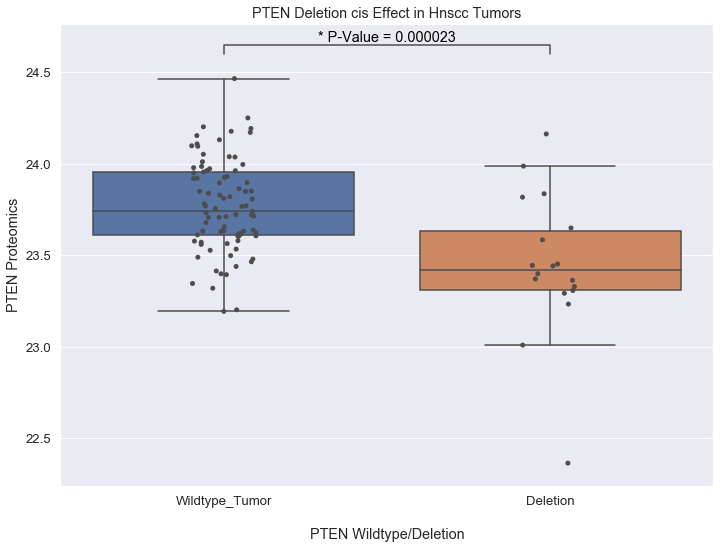

In [23]:
#cis
gene = 'PTEN'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=gene+"_proteomics", data = del_wt,
                      order = ["Wildtype_Tumor", "Deletion"], showfliers = False)    
boxplot.set_title('PTEN Deletion cis Effect in Hnscc Tumors')
boxplot = sns.stripplot(x='Mutation', y=gene+"_proteomics", data = del_wt, jitter = True, 
                           color = ".3", order = ["Wildtype_Tumor", "Deletion"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = gene+' Proteomics')

format_pval_annotation('* P-Value = 0.000023', 0, 1, 24.6)

plt.show()
plt.clf()
plt.close()

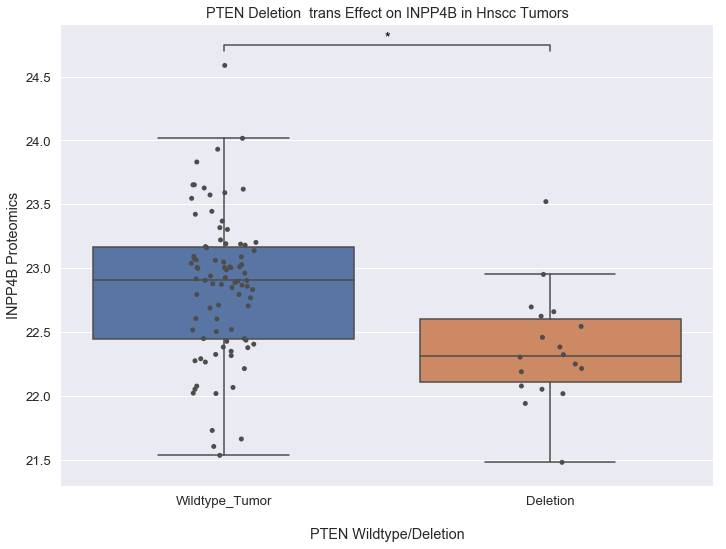

In [21]:
#trans
g = 'INPP4B'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=g+"_proteomics", data = del_wt,
                      order = ["Wildtype_Tumor", "Deletion"], showfliers = False)    
boxplot.set_title('PTEN Deletion  trans Effect on '+g+' in Hnscc Tumors')
boxplot = sns.stripplot(x='Mutation', y=g+"_proteomics", data = del_wt, jitter = True, 
                           color = ".3", order = ["Wildtype_Tumor", "Deletion"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = g+' Proteomics')

format_pval_annotation('*', 0, 1, 24.7)

plt.show()
plt.clf()
plt.close()

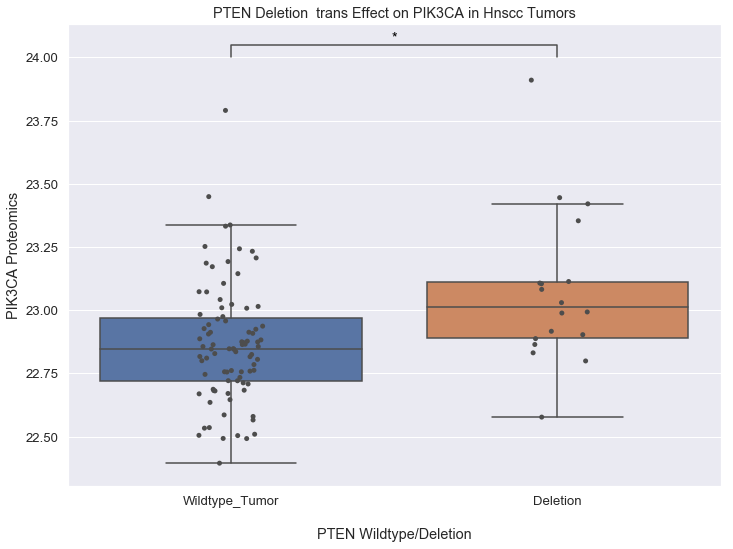

In [20]:
#trans
g = 'PIK3CA'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=g+"_proteomics", data = del_wt,
                      order = ["Wildtype_Tumor", "Deletion"], showfliers = False)    
boxplot.set_title('PTEN Deletion  trans Effect on '+g+' in Hnscc Tumors')
boxplot = sns.stripplot(x='Mutation', y=g+"_proteomics", data = del_wt, jitter = True, 
                           color = ".3", order = ["Wildtype_Tumor", "Deletion"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = g+' Proteomics')

format_pval_annotation('*', 0, 1, 24)

plt.show()
plt.clf()
plt.close()

In [26]:
d = del_wt[del_wt.Mutation == "Deletion"]
wt = del_wt[del_wt.Mutation == "Wildtype_Tumor"]
del_med = d.median()
wt_med = wt.median()

d = {}

for prot in ip:
    dif = del_med[prot+'_proteomics'] - wt_med[prot+'_proteomics']
    d[prot] = dif
    print(del_med[prot+'_proteomics'], '-', wt_med[prot+'_proteomics'], '=',dif)

df = pd.DataFrame.from_dict(d, orient='index', columns=['Hnscc'])
df

nan - nan = nan
26.17192326504395 - 26.092223093972603 = 0.07970017107134808
25.75499678645585 - 25.8549493247032 = -0.09995253824734718
22.652482697824148 - 22.6104394271772 = 0.04204327064694624
25.066756968708596 - 25.1080435495472 = -0.04128658083860515
25.3487155027312 - 25.442639200849104 = -0.09392369811790502
27.812361676958652 - 27.6568780506676 = 0.15548362629105128
nan - nan = nan
23.426195148709198 - 23.2088570004054 = 0.21733814830379927
23.01147468665885 - 22.8478113352914 = 0.16366335136745036
22.5545112161171 - 21.84895083437485 = 0.7055603817422487
26.754030189281696 - 26.2868028238093 = 0.4672273654723966
22.6017985890391 - 22.4485124329462 = 0.15328615609289997
26.7848286075468 - 26.646696010034297 = 0.1381325975125023
26.147322792086502 - 26.0532418843789 = 0.09408090770760325
23.913554325741153 - 23.8641569794152 = 0.049397346325953606
23.420205129738548 - 23.7390174046162 = -0.31881227487765074
19.2709839158765 - 18.2755974367219 = 0.9953864791546003
20.0717989308

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Hnscc
MDM2,NaN
CSNK2A1,0.079700
PDGFRB,-0.099953
PIK3R2,0.042043
PIK3C3,-0.041287
CSNK2A2,-0.093924
SLC9A3R1,0.155484
PIK3R3,NaN
USP13,0.217338
PIK3CA,0.163663
